# Projet 7 : Implémentez un modèle de scoring : Regression Logistique

L'objectif de ce notebook est d'appliquer maintenant un modèle linéaire avec la [regression logistique](https://datascientest.com/regression-logistique-quest-ce-que-cest#:~:text=La%20r%C3%A9gression%20logistique%20est%20un,logistique%20comme%20fonction%20de%20lien.)

La régression logistique est un modèle statistique permettant d’étudier les relations entre un ensemble de variables qualitatives Xi et une variable qualitative Y. Il s’agit d’un modèle linéaire généralisé utilisant une fonction logistique comme fonction de lien. 

Un modèle de régression logistique permet aussi de prédire la probabilité qu’un événement arrive (valeur de 1) ou non (valeur de 0) à partir de l’optimisation des coefficients de régression. Ce résultat varie toujours entre 0 et 1. Lorsque la valeur prédite est supérieure à un seuil, l’événement est susceptible de se produire, alors que lorsque cette valeur est inférieure au même seuil, il ne l’est pas.

## Importation des modules

In [ ]:
pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np 
import pandas as pd

## PLOT
import matplotlib.pyplot as plt
import seaborn as sns

## Modelisation
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold

## Scores
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import fbeta_score
from sklearn.metrics import precision_recall_fscore_support
import scikitplot as skplt
from sklearn.model_selection import cross_val_score
from sklearn.metrics import  make_scorer
from sklearn.metrics import recall_score, precision_score, accuracy_score
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
## Threshold
from yellowbrick.classifier.threshold import discrimination_threshold

## Warning
import warnings

In [ ]:
warnings.filterwarnings("ignore")

##  Importation de données

In [ ]:
use_colab = True 

if use_colab:
    from google.colab import drive
    drive.mount('/content/drive')
    PATH ='/content/drive/MyDrive/'
else:
    PATH ='/data/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataset = pd.read_csv(PATH + 'df_final.csv')

In [ ]:
X_train_smtomek = pd.read_csv(PATH+"X_train_smtomek.csv")
y_train_smtomek = pd.read_csv(PATH+"y_train_smtomek.csv")

In [ ]:
X_test_smtomek =  pd.read_csv(PATH+"X_test_smtomek.csv")
y_test_smtomek = pd.read_csv(PATH+"y_test_smtomek.csv")

## Mise en place du modèle de Regression Logistique de base

In [ ]:
from sklearn.model_selection import KFold, StratifiedKFold

In [ ]:
from sklearn.metrics import recall_score, precision_score, accuracy_score

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics

model_LR= LogisticRegression()

In [ ]:
model_LR.fit(X_train_smtomek,y_train_smtomek)

LogisticRegression()

In [ ]:
print(f'Accuracy: {accuracy_score(y_train_smtomek, model_LR.predict(X_train_smtomek))}')
print(f'Precision: {precision_score(y_train_smtomek, model_LR.predict(X_train_smtomek))}')
print(f'Recall: {recall_score(y_train_smtomek, model_LR.predict(X_train_smtomek))}')

Accuracy: 0.578498852835136
Precision: 0.5712668477295225
Recall: 0.6637548145832474


In [ ]:
X_train_smtomek

,0,1,2,3,4,5,6,7,8,9,...,65,66,67,68,69,70,71,72,73,74
0,0.000000,-0.135000,0.498262,-0.422576,-0.337914,-3.336846,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,1.000000,0.0,0.0,0.0,1.0,0.0
1,1.000000,0.125000,-0.266266,-0.518572,0.569053,0.304824,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,1.000000,0.0,0.0,0.0,1.0,0.0
2,0.000000,-0.375000,-0.622373,0.099855,-0.222207,0.180786,-7.000000,0.000000,1.000000,1.000000,...,0.0,0.000000,0.0,0.0,1.000000,0.0,0.0,0.0,1.0,0.0
3,0.000000,-0.075000,0.299766,-0.900895,-0.706747,-0.222943,0.000000,-1.000000,1.000000,1.000000,...,0.0,0.000000,0.0,0.0,1.000000,0.0,1.0,0.0,0.0,0.0
4,0.000000,-0.125000,0.507937,-0.750442,-0.523980,0.308472,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,1.000000,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335605,1.503436,-0.612242,-0.407554,-0.480570,0.534269,-0.197596,0.000000,1.255154,0.751718,0.751718,...,0.0,0.248282,0.0,0.0,0.751718,0.0,0.0,0.0,1.0,0.0
335606,0.342062,-0.625000,-0.133389,0.342094,0.274234,-1.671052,-3.657938,0.342062,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,1.000000,0.0,1.0,0.0,0.0,0.0
335607,2.000000,-0.594162,-0.117584,0.088357,0.651291,-0.334495,0.000000,2.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,1.000000,0.0,0.0,0.0,1.0,0.0
335608,0.000000,0.754836,1.043745,-0.123823,-0.581373,0.373236,0.000000,-0.879836,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,1.000000,0.0,1.0,0.0,0.0,0.0


In [ ]:
y_prob = model_LR.predict_proba(X_test_smtomek)[:,1] # This will give you positive class prediction probabilities  
y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
model_LR.score(X_test_smtomek, y_pred)

1.0

In [ ]:
confusion_matrix=metrics.confusion_matrix(y_test_smtomek,y_pred)
confusion_matrix

array([[55213, 57936],
       [ 3423,  6433]])

In [ ]:
auc_roc=metrics.roc_auc_score(y_test_smtomek,y_pred)
auc_roc

0.5703330286683529

In [ ]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_smtomek, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.5886027781664287

Text(0.5, 0, 'False Positive Rate')

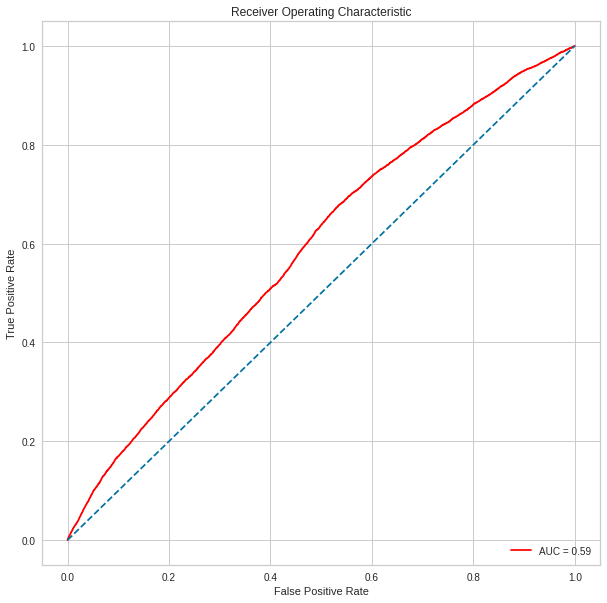

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

## Regression logistique avec optimisation des paramètres

In [ ]:
tuned_parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] ,
              'penalty':['l1','l2']
                   }

In [ ]:
dataset.corr()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,OWN_CAR_AGE,CNT_FAM_MEMBERS,...,AMT_ANNUITY,AMT_CREDIT_y,AMT_DOWN_PAYMENT,DAYS_DECISION,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_LAST_DUE,DAYS_TERMINATION,CNT_INSTALMENT_FUTURE,SK_DPD_y
SK_ID_CURR,1.000000,-0.002108,-0.001129,-0.001820,-0.000343,0.000849,-0.001500,0.001366,0.001818,-0.002895,...,0.000296,0.001204,0.000327,-0.001339,0.001940,-0.002284,-0.002203,-0.002001,-0.000042,0.000660
TARGET,-0.002108,1.000000,0.019187,-0.003982,-0.030369,-0.037227,0.078239,-0.044932,0.037612,0.009308,...,-0.034871,-0.016114,-0.024624,0.046864,0.027743,-0.048803,0.026923,0.025795,0.025706,0.007565
CNT_CHILDREN,-0.001129,0.019187,1.000000,0.012882,0.002145,-0.025573,0.330938,-0.239818,0.008494,0.879161,...,-0.047079,-0.054255,-0.005452,-0.006301,-0.066231,0.004740,-0.020098,-0.019589,-0.062841,-0.002492
AMT_INCOME_TOTAL,-0.001820,-0.003982,0.012882,1.000000,0.156870,0.074796,0.027261,-0.064223,-0.117273,0.016342,...,0.131631,0.104007,0.039447,0.002843,0.022970,-0.012165,0.001025,0.000898,0.017448,-0.001379
AMT_CREDIT_x,-0.000343,-0.030369,0.002145,0.156870,1.000000,0.099738,-0.055436,-0.066838,-0.094191,0.063160,...,0.222838,0.203889,0.067757,-0.084624,0.056181,-0.003937,-0.107182,-0.099287,0.026594,0.008170
REGION_POPULATION_RELATIVE,0.000849,-0.037227,-0.025573,0.074796,0.099738,1.000000,-0.029582,-0.003980,-0.081429,-0.024209,...,0.121506,0.090182,0.037609,-0.033936,0.005191,-0.013594,0.000003,0.001419,0.003798,0.002454
DAYS_BIRTH,-0.001500,0.078239,0.330938,0.027261,-0.055436,-0.029582,1.000000,-0.615864,0.005761,0.278894,...,-0.109413,-0.130806,-0.014239,0.078699,-0.173456,-0.034218,-0.043674,-0.044650,-0.188490,-0.011991
DAYS_EMPLOYED,0.001366,-0.044932,-0.239818,-0.064223,-0.066838,-0.003980,-0.615864,1.000000,0.028830,-0.233549,...,-0.012954,0.003223,-0.017407,0.001849,0.099758,0.056664,0.039526,0.034993,0.099969,0.004743
OWN_CAR_AGE,0.001818,0.037612,0.008494,-0.117273,-0.094191,-0.081429,0.005761,0.028830,1.000000,-0.015061,...,-0.120662,-0.095690,-0.044919,-0.007454,-0.033589,0.019636,-0.007976,-0.009695,-0.027109,-0.002275
CNT_FAM_MEMBERS,-0.002895,0.009308,0.879161,0.016342,0.063160,-0.024209,0.278894,-0.233549,-0.015061,1.000000,...,-0.002372,-0.002960,-0.000074,-0.016880,-0.032459,-0.001706,-0.013449,-0.012124,-0.021451,0.000333


In [ ]:
from sklearn.model_selection import GridSearchCV
LR_model= LogisticRegression()
LR= GridSearchCV(LR_model, tuned_parameters,cv=10)

In [ ]:
LR.fit(X_train_smtomek,y_train_smtomek)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']})

In [ ]:
print(LR.best_params_)

{'C': 0.001, 'penalty': 'l2'}


In [ ]:
y_prob = LR.predict_proba(X_test_smtomek)[:,1] # This will give you positive class prediction probabilities  
y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
LR.score(X_test_smtomek, y_pred)

1.0

In [ ]:
confusion_matrix=metrics.confusion_matrix(y_test_smtomek,y_pred)
confusion_matrix

array([[55187, 57962],
       [ 3422,  6434]])

In [ ]:
auc_roc=metrics.classification_report(y_test_smtomek,y_pred)
auc_roc

'              precision    recall  f1-score   support\n\n           0       0.94      0.49      0.64    113149\n           1       0.10      0.65      0.17      9856\n\n    accuracy                           0.50    123005\n   macro avg       0.52      0.57      0.41    123005\nweighted avg       0.87      0.50      0.61    123005\n'

In [ ]:
auc_roc=metrics.roc_auc_score(y_test_smtomek,y_pred)
auc_roc

0.5702688664357984

In [ ]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_smtomek, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.5886191959002341

Text(0.5, 0, 'False Positive Rate')

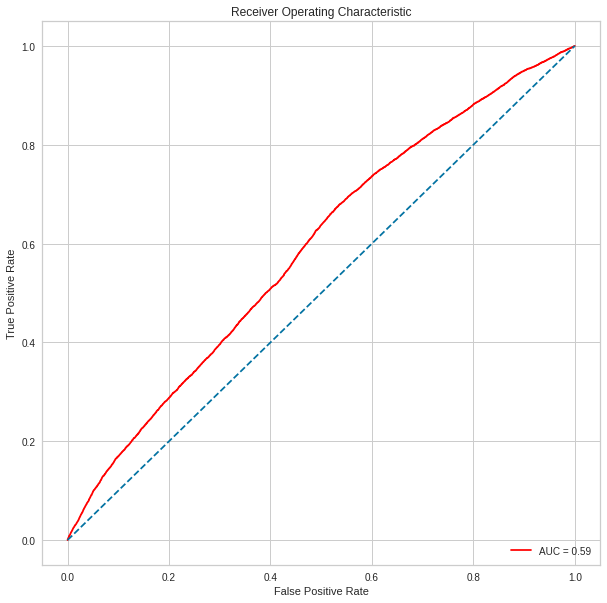

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

Conclusion: les scores sont meilleurs que pour le modèle baseline mais restent insuffisants pour une classification efficace de nos clients, on va donc faire un notebook avec Random Forest
